In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # tính khoảng cách giữa các cặp điểm trong hai tập hợp
np.random.seed(11)

## Exercise 1
Implement kmean algorithm by Numpy.

In [3]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


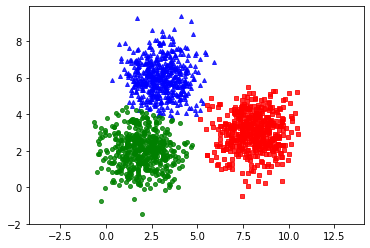

In [4]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])


## Exercise 2
Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

### Dataset 1

3 clusters


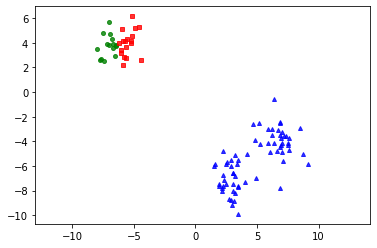

6 clusters


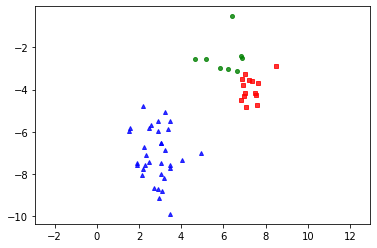

9 clusters


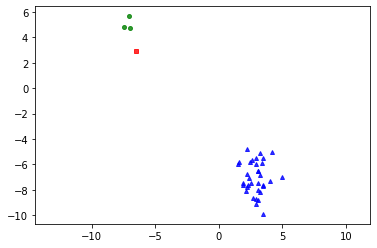

In [5]:
from sklearn import datasets

X_1, y = datasets.make_blobs()
#X_1 = X_1['data'][:,:2]

#y = iris.target
for K in [3, 6, 9]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_1, K)
    kmeans_display(X_1, labels[-1])


### Dataset 2

3 clusters


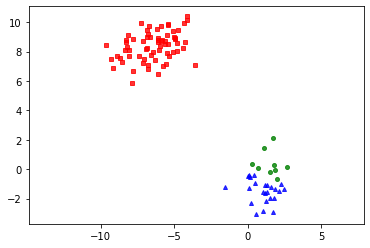

6 clusters


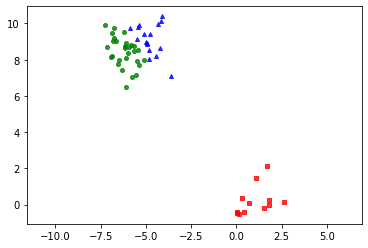

9 clusters


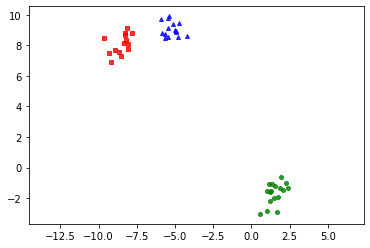

In [6]:
X_2, y = datasets.make_blobs()
#X_2 = X_2['data'][:, :2]

for K in [3, 6, 9]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_2, K)
    kmeans_display(X_2, labels[-1])


### Dataset 3

3 clusters


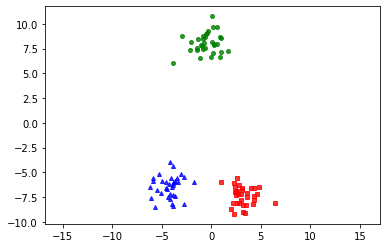

6 clusters


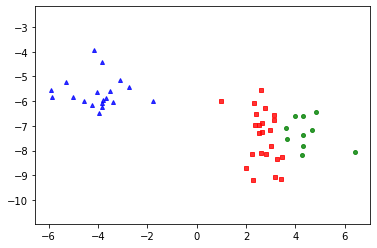

9 clusters


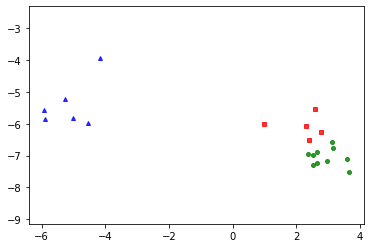

In [7]:
X_3, y = datasets.make_blobs()
#X_3 = X_3['data'][:,:2]

for K in [3, 6, 9]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_3, K)
    kmeans_display(X_3, labels[-1])


## Exercise 3
Read and understand how to choose k (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

In [8]:
from sklearn.cluster import KMeans
def plot_elbow(datasets):
    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(datasets)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()


C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-pa

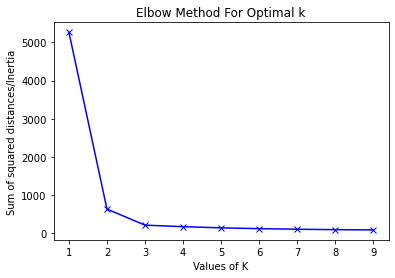

In [9]:
plot_elbow(X_1)

C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-pa

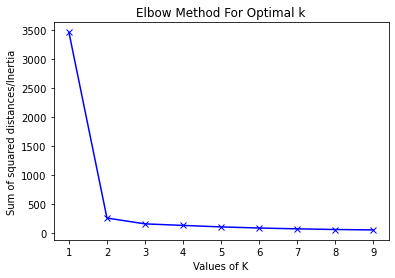

In [10]:
plot_elbow(X_2)

C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laptop MD\anaconda3\lib\site-pa

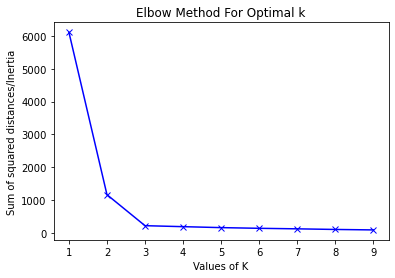

In [11]:
plot_elbow(X_3)

## Exercise 4:
Read the limitation of kmean (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three example k-mean doesn't work.

9 clusters


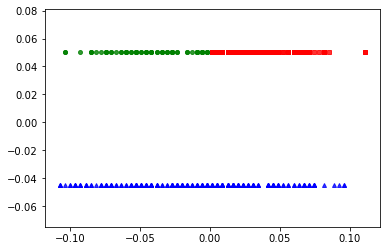

In [30]:
X_4 = datasets.load_diabetes()
X_4 = X_4['data'][:,:2]

#for K in [3, 6, 9]:

(centers, labels, it) = kmeans(X_4, K=3)
kmeans_display(X_4, labels[-1])


##### 1. Clusters need to be circular

Dưới đây là 1 ví dụ khi cluster có dạng hình dẹt.

Centers found by our algorithm:
[[ 1.31366111  1.35494405]
 [-0.18353407 -1.24689907]
 [ 1.61545599 -0.81446291]]


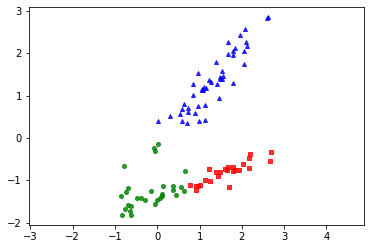

In [41]:
from sklearn.datasets import make_classification
X, Y1 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
#plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
(centers, labels, it) = kmeans(X, K= 3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

 #### 2. Choosing K (number of clusters) manually raises problem about too few or too much cluster needed

Centers found by our algorithm:
[[-1.26551713  7.7693112 ]
 [-0.32224425  3.6089909 ]
 [ 1.97306689  0.84915787]]


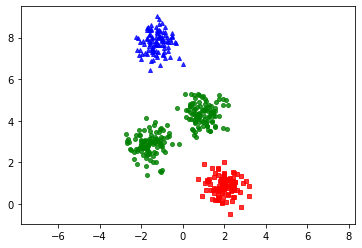

In [36]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
(centers, labels, it) = kmeans(X, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

#### 3.  Kmean struggles when one cluster exists within another
Because it requires linear cluster boundaries so in some irregular datasets, Kmean cannot give best performance

Centers found by our algorithm:
[[ 0.190472    0.59634808]
 [ 0.428947   -0.46106464]
 [-0.60303105 -0.13390405]]


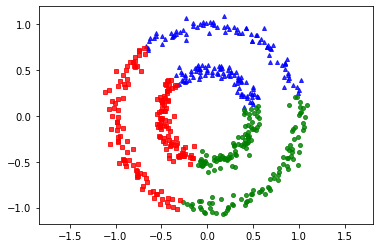

In [37]:
from sklearn import datasets
X, y = datasets.make_circles(n_samples=500, noise=0.05,factor=0.5, random_state=0)
(centers, labels, it) = kmeans(X, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])